### Fandom Trends and Pecularities From AO3 Data
#### Made by: Rebekah Washburn (u1310114), Noble Ledbetter (u0967666), and Henry Brunisholz (u1276675)

### Background and Motivation
___

The world of fanfiction has been thriving for years. Many popular authors started in fanfiction, and famous novels like *Fifty Shades of Grey* by E. L. James and *After* by Anna Todd started as fan works. As the world of fanfiction and fandom has become more mainstream, sites like [Archive of Our Own (AO3)](https://archiveofourown.org) have held millions of works available for people to enjoy. Both Henry and Rebekah are interested in fanfiction and the data surround these works and are excited to analyze data AO3 specifically. While Noble, an aspiring author, is interested to see trends in the fanfiction universe. We hope to create something meaningful, like Toastystats' fandom statistics, found [here](https://archiveofourown.org/users/destinationtoast/pseuds/toastystats/works?fandom_id=87791).


## Project Objectives
___
We have successfully completed many of the objectives as presented in our project proposal draft, discovering:
- Rating does relate to popularity.
- The various measures of popularity are tightly correlated.
- Length has some relation to popularity.
- There are possible mismatches between supply and demand - for example, longer works are broadly speaking more popular but works tend to be short.

On the skills side, we got practice with:
- cleaning and converting SQLLite to csv.
- Cutting up a large data-set into managable chunks.
- Sorting through and analyzing a new data-set, from "the wild".

## Background

Fanfiction is the term used to describe written works made by fans about and taking place in media properties - like books and movies. It has been around for a long time, longer if you count derivative works made before the advent of copyright like Virgil's Aeneid - an epic poem in the tradition of Homer's works and with many shared characters and mythical elements.

In the modern era, fanfiction is mostly released on the internet on fanfiction hosting websites like fanfiction.net, wattpad, and ArchiveOfOurOwn (AO3).

AO3 specifically is unique in that it is an **archive** meaning that the non-profit that made the site explicitly intends it to be used for preservational and even historical purposes, keeping the creative effort of fans around for years to come. In pursuing this purpose, the archive is known to have quite relaxed rules surrounding content, letting many different types of work not allowed on other sites in.

The structure of AO3 is quite different from the more commercialized websites, like Wattpad, it lacks any algorthimically generated reccomendations. Instead, users search for works using a highly detailed "tagging" system where every fanfiction has tags for fandoms, characters, relationships, and much more. This data is attached to each work, making the tags very useful for a project like this.

Finally, each work in the archive has several bits of meta-data like a title, length, and author name. In addition, there is a hit-tracker that counts how many seperate devices/IPs have viewed each work, an option for readers to like the work (called "kudos"), an option for readers to comment on each chapter of a work, and an option for readers to save or "bookmark" a work, to receive email notifications when the work updates.


### Data Description

The data we are analyzing was collected in 2020 by reddit user theCodeCat, who scraped non-user-restricted fan-works from ArchiveOfOurOwn (AO3). The data is available for download [here](https://www.reddit.com/r/datasets/comments/i254cw/archiveofourown_dataset/), and is in a SQLite3 database.

After processing, our initial sample consists of ~100,000 fan-works with the following information contained in two files - reduced_project_info and reduced_chapter_text.

reduced_project_info contains the following data about these fan-works:
- id
- title (user entered)
- date published (user entered)
- language (user entered)
- rating (user entered)
- completion status (user entered)
- number of words
- number of hits
- number of kudos
- number of comments
- number of bookmarks
- description  (user entered)

reduced_chapter_text contains the following data for a smaller subset of works:
- id
- chapter number
- chapter text (user entered)


### Acquistion

Acquistion was done via downloading the scrapped AO3 data provided by theCodeCat, the link in the "Data Description" section contains that data available for download.


## Cleaning

The data we aquired was already well organized and cleaned, but since it was stored in an SQLite3 database, we needed to extract the information and organize it into panda dataframes. The following is code from our file, "SQLite3_to_csv". It will not run properly, as I cannot include the SQLite3 file due to its size. **A note about the following code - almost all sections of code have their own import statements, as we ran the segments needed at different times, depending on the information we were currently retrieving.** 

We start by grabbing all the data unrelated to each work's chapter text and tags.

In [ ]:
import pandas as pd
import csv
import sqlite3

# This code grabs the main, numerical data
conn = sqlite3.connect("organizedData.sqlite3")
df = pd.DataFrame()

query_1 = "SELECT id, title, date, language, restricted, rating, finished, words, hits, kudos, bookmarks, comments, description FROM StoryHeaders LIMIT 100000"
query_2 = "SELECT * from Languages"
query_3 = "SELECT * from Ratings"
query_4 = "SELECT * from FinishedState"
# Info on LIMIT: https://www.w3schools.com/sql/sql_top.asp

pd.read_sql_query(query_3, conn)
df = pd.read_sql_query(query_1, conn)
lan = pd.read_sql_query(query_2, conn)
rat = pd.read_sql_query(query_3, conn)
fin = pd.read_sql_query(query_4, conn)
conn.close()

print("done")
Once we turned the main data into a data frame, the data frame "df" is left with integers in columns that do not make sense, such as language, age rating, and whether the book is finished. These numbers were given text meanings in the other three data frames created. We next take the text info from "lan", "rat", and "fin", and bring it into "df".
df["LanguageName"] = None
df["RatingName"] = None
df["FinishedStatus"] = None

# I perpetually chain my indexes, so I used these to help me fix my code: https://stackoverflow.com/questions/32357311/python-pandas-how-to-avoid-chained-assignment
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

for index in df.index.to_list():
    lan_df = df["language"]
    try:
        for iden in lan.index.to_list():
            if int(lan_df.iloc[index]) == int(lan.loc[iden, "id"]):
                df.loc[index, "LanguageName"] = lan.loc[iden, "Language_Name"]
    except:
        pass
    
    rat_df = df["rating"]
    try:
        for iden in rat.index.to_list():
            if int(rat_df.iloc[index]) == int(rat.loc[iden, "id"]):
                df.loc[index, "RatingName"] = rat.loc[iden, "name"]
    except:
        pass

    fin_df = df["finished"]
    try:
        for iden in fin.index.to_list():
            if int(fin_df.iloc[index]) == int(fin.loc[iden, "id"]):
                df.loc[index, "FinishedStatus"] = fin.loc[iden,"name"]
    except:
        pass
    
print("done")

We then store our data in a csv file. Though the next cell would typically be code, I am marking it as text to make sure it is not accidentally run.
#### Code
import os

*#This bit creates a csv of the Data Frame from the above code*

*#DO NOT RUN!*

try:
    os.remove('reduced_project_info.csv')
except:
    pass

df.to_csv('reduced_project_info.csv')
print('done')

#### End of Code

We also wanted to look at chapter text from our collected works. We grab the first 1000 stored chapters. Note that for this part we chose to grab the first 1000 chapters from the initial table they were contained in, so these chapters are not necessarily coming from the same works analyzed with our "reduced_project_info.csv" file. We plan to add to this later so that we only look at chapter text for works we are analyzing in the original data frame.


In [ ]:
import pandas as pd
import csv
import sqlite3

# This code retrieves text from the first 1000 chapters

conn = sqlite3.connect("organizedData.sqlite3")
query_chapts = "SELECT storyId, idx, text FROM Chapters LIMIT 1000"

chapters = pd.read_sql_query(query_chapts, conn)

# We want the "text" column, as someone has already sorted through it for us (I love theCodeCat!)
chapters = chapters.rename(columns={"idx": "chapterNumber"})
print(chapters)

We then save the file in a csv file, like we did with the "df" data frame. Since the code for this looks almost identical to the code provided above, I am not including it so it does not get run, and thus wipes our retrieved data. 

Our last bit of cleaning focuses on the tags attached to works. These tags may contain the fandom the work is about, characters in the story, or key components in the story. We start by grabbing the works and the tagIds attached to each work. In the entire database, there are nearly 90,000,000 tag uses. We used these tags in multiple ways. 1. We analyzed the We have saved ~4100 tags separately to use in a natural language processing model to see if we can predict the category of tag based on the tag name.


In [ ]:
import pandas as pd
import csv
import sqlite3

# This code will grab the tags assigned to each story, and will grab the tagId's text meaning, and the type
# of tag it is. For now, we are just working with the tags assigned to stories. 
# (Code for grabbing the tagId's name and type is commented out.)

conn = sqlite3.connect("organizedData.sqlite3")
#query_tags = "SELECT id, name, type FROM Tags"
query_story_tags = "SELECT * FROM TagLinks"

# tags_data = pd.read_sql_query(query_tags, conn)
story_tags_data = pd.read_sql_query(query_story_tags, conn)

# print(story_tags)
print(story_tags_data)

We then save the "story_tags_data" to a csv. We then look at the story ids for the first 10,000 works in our "reduced_project_info" file, and open the file we just created for tag data. We then filter our tag data so it only contains tag usage from the 10,000 selected stories. 


In [ ]:
import pandas as pd
import csv
import sqlite3

data = pd.read_csv("story_tags.csv")
sample_dat = pd.read_csv("reduced_project_info.csv")
sample_dat = sample_dat.iloc[:10000]

unique_works = []

for numb in sample_dat["id"]:
    if numb not in unique_works:
        unique_works.append(numb)

iden_numb = data.index.to_list()

tag_data = data.copy(deep = True)
tag_data = tag_data.iloc[:100000]
tag_dat = tag_data.copy(deep= True)

numbs = tag_data.index.to_list()

count = 0
# This just helps me know the code is still running.

for iden in numbs:
    if int(tag_data.loc[iden, "storyId"]) not in unique_works:
        tag_dat.drop([iden], inplace = True)
        count += 1
        print(count)
        
print("done")

We then save resave this as a csv. We then use this new file, "small_story_tags.csv", and use it to pull the specific tag names and their type from the SQLite3 database.


In [ ]:
import pandas as pd
import csv
import sqlite3

# Assessing Top Tags
data = pd.read_csv("small_story_tags.csv")
try:
    data= data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
except:
    pass

counts = data["tagId"].value_counts()
print("done")

conn = sqlite3.connect("organizedData.sqlite3")


for value in counts.index.to_list():
    query_1 = f"SELECT id, name, type FROM Tags WHERE id = {value}"
    df = pd.read_sql_query(query_1, conn)
    for index in data.index.to_list():
        if data.loc[index, "tagId"] == value:
            data.loc[index, "Tag Name"] = df.loc[0, "name"]
            data.loc[index, "Tag Type"] = df.loc[0, "type"]
        
conn.close()
print(data)
print("done")

## Analysis/Methods/Results

Our analysis consists of many smaller tasks, the code for these tasks is presented below.


In [6]:
### Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import ttest_ind

# Read the data from the file
data = pd.read_csv("not_reduced_project_info.csv")

# Drop rows with missing values
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

# Replace infinite values with NaN and drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

### How correlated are different notions of popularity?

To answer this question, we will create a correlation matrix comparing our four possible measures of popularity - hits, kudos, comments, and bookmarks.


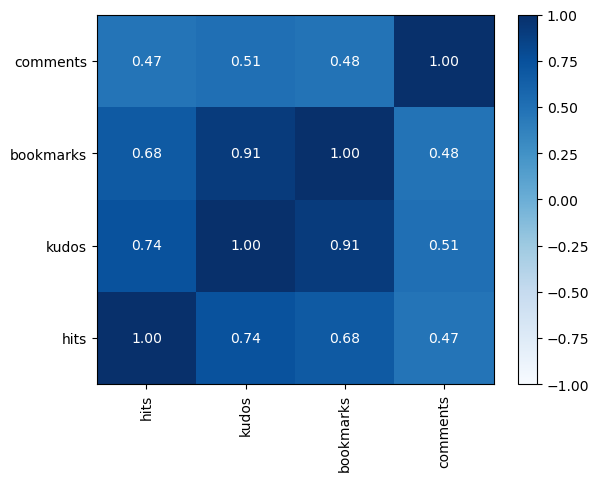

In [7]:
# Analyzing the Correlation Between Different Measures of Popularity
col_keep = ["hits", "kudos", "comments", "bookmarks"]

corr_data = data.copy(deep=True)

for col in corr_data.columns:
    if col not in col_keep:
        corr_data.drop(columns=[col], inplace=True)

corr_data = corr_data.corr()

heatmap = plt.pcolor(corr_data, cmap=plt.cm.Blues, vmin=-1, vmax=1)
ticks = [x + 0.5 for x in range(0, len(corr_data.columns))]
labels = [x for x in corr_data.columns]

plt.xticks(ticks=ticks, labels=labels, rotation=90)
plt.yticks(ticks=ticks, labels=labels)

# plot the legend on the side
plt.colorbar(heatmap)

# Print the correlation values
for i, col1 in enumerate(corr_data.columns):
    for j, col2 in enumerate(corr_data.columns):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr_data.iloc[i, j]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=10, color='white')

plt.show()


### Strongly Correlated

Our correlation matrix shows that all four measures of popularity are strongly positively correlated with one another.


### What languages are fanfics written in?

To answer this question we will count the number of works under each language in our data set and calculate the % of the total that they form.


In [8]:
# Group data by language and count the number of fanfics in each language
lang = data.groupby('LanguageName').count()

# Calculate the percentage of total works for each language
lang['percentage'] = lang['language'] / len(data) * 100

# Print the number of works in each language
print(lang['language'])
print()

# Print the number of unique languages in the dataset
print('Number of unique languages in dataset:', len(lang))
print()

# Print the total number of entries in the dataset
print('Number of entries in dataset:', len(data))
print()

# Print the percentage of total works for each language
for i in range(len(lang['language'].index)):
    perc = round(lang['language'][i] / len(data), 3) * 100
    if perc >= 0.1:
        print(lang['language'].index[i], 'makes up', str(perc) + '% of the total data.')
    else:
        print(lang['language'].index[i], 'makes up less than 0.1% of the total data.')


LanguageName
Afrikaans               20
Bahasa Indonesia     10893
Bahasa Malaysia         23
Bosanski                21
Català                  82
                     ...  
ไทย                    731
ქართული                  1
中文                  267889
日本語                    519
한국어                   1461
Name: language, Length: 71, dtype: int64

Number of unique languages in dataset: 71

Number of entries in dataset: 6000351

Afrikaans makes up less than 0.1% of the total data.
Bahasa Indonesia makes up 0.2% of the total data.
Bahasa Malaysia makes up less than 0.1% of the total data.
Bosanski makes up less than 0.1% of the total data.
Català makes up less than 0.1% of the total data.
Chinuk Wawa makes up less than 0.1% of the total data.
Cymraeg makes up less than 0.1% of the total data.
Dansk makes up less than 0.1% of the total data.
Deutsch makes up 0.2% of the total data.
English makes up 91.4% of the total data.
Español makes up 0.8% of the total data.
Esperanto makes up less

### Mostly English

The fanworks in this data set are mostly written in English, which makes up 91.4% of the total. The next most used language is Chinese, which makes up 4.5% of the total. Russian is third, with 1.7% of the total.


### Summary Statistics

The summary statistics we will provide are:

    number of fanfics in the data set
    average word count
    % of fics finished
    number of fics for each rating
    average number of hits
    average number of kudos
    average number of comments
    average number of bookmarks

In [9]:
# Number of fanfics in the dataset
num_fanfics = len(data)

# Average word count
avg_word_count = data['words'].mean()

# Percentage of fics finished
percent_finished = (data['finished'].sum() / num_fanfics) * 100

# Number of fics for each rating
rating_counts = data['RatingName'].value_counts()

# Average number of hits
avg_hits = data['hits'].mean()

# Average number of kudos
avg_kudos = data['kudos'].mean()

# Average number of comments
avg_comments = data['comments'].mean()

# Average number of bookmarks
avg_bookmarks = data['bookmarks'].mean()

# Print summary statistics
print("Summary Statistics")
print(f"- Number of fanfics in the dataset: {num_fanfics}")
print(f"- Average word count: {avg_word_count:.2f}")
print(f"- Percentage of fics finished: {percent_finished:.2f}%")
print("- Number of fics for each rating:")
print(rating_counts)
print(f"- Average number of hits: {avg_hits:.2f}")
print(f"- Average number of kudos: {avg_kudos:.2f}")
print(f"- Average number of comments: {avg_comments:.2f}")
print(f"- Average number of bookmarks: {avg_bookmarks:.2f}")


Summary Statistics
- Number of fanfics in the dataset: 6000351
- Average word count: 7006.06
- Percentage of fics finished: 73.42%
- Number of fics for each rating:
RatingName
Teen And Up          1799659
General Audiences    1709014
Explicit              956973
Mature                923835
Not Rated             610870
Name: count, dtype: int64
- Average number of hits: 2190.62
- Average number of kudos: 119.32
- Average number of comments: 16.82
- Average number of bookmarks: 16.31


### How long are fanfics?
To answer this question, we will create a bar chart that visualizes the number of works in each bucket of length, notably we are using the same bin size we use in the "Are long fanfics more popular?" section.


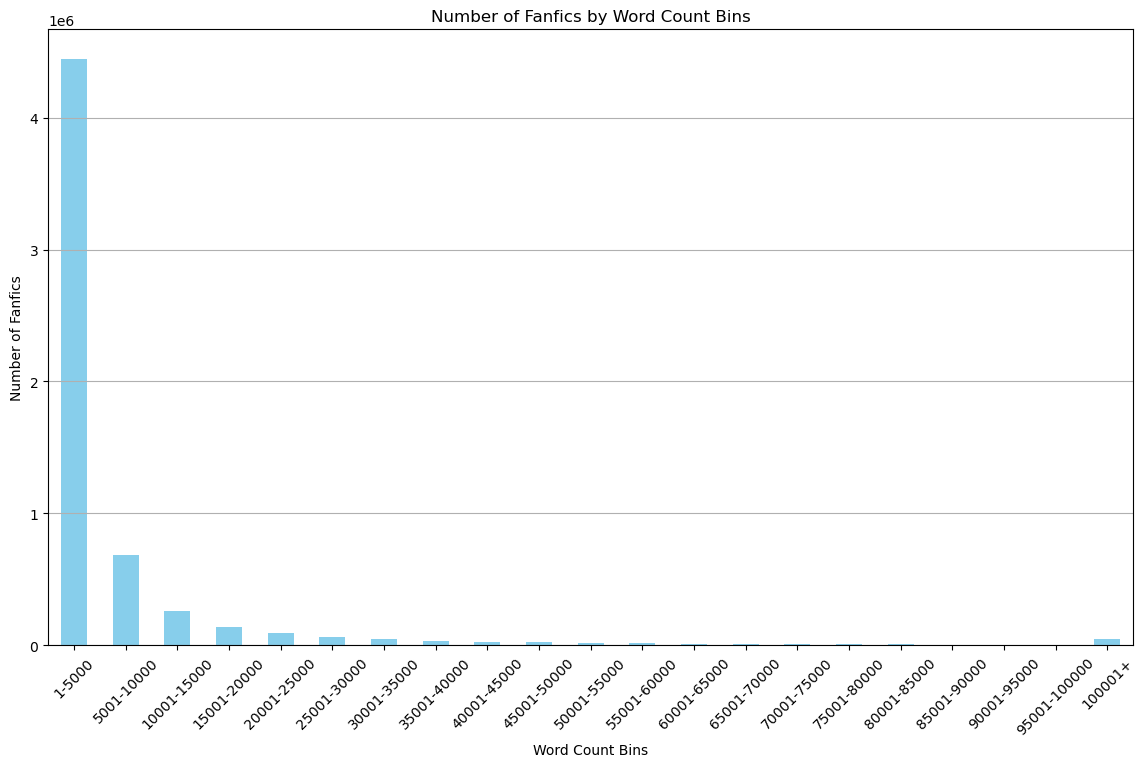

1-5000: 4,447,042 fanfics
5001-10000: 688,530 fanfics
10001-15000: 259,007 fanfics
15001-20000: 138,722 fanfics
20001-25000: 90,596 fanfics
25001-30000: 62,604 fanfics
30001-35000: 46,620 fanfics
35001-40000: 34,941 fanfics
40001-45000: 28,002 fanfics
45001-50000: 22,169 fanfics
50001-55000: 19,126 fanfics
55001-60000: 15,025 fanfics
60001-65000: 12,910 fanfics
65001-70000: 10,541 fanfics
70001-75000: 9,161 fanfics
75001-80000: 7,850 fanfics
80001-85000: 6,875 fanfics
85001-90000: 5,992 fanfics
90001-95000: 5,292 fanfics
95001-100000: 4,441 fanfics
100001+: 47,889 fanfics


In [10]:
# Define the bins for word counts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, float('inf')]

# Create a new column in the DataFrame to represent the bin for each fanfic
data['word_bin'] = pd.cut(data['words'], bins=bins, labels=['1-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35001-40000', '40001-45000', '45001-50000', '50001-55000', '55001-60000', '60001-65000', '65001-70000', '70001-75000', '75001-80000', '80001-85000', '85001-90000', '90001-95000', '95001-100000', '100001+'])

# Count the number of fanfics in each bin
fanfic_counts_by_bin = data['word_bin'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(14, 8))
fanfic_counts_by_bin.plot(kind='bar', color='skyblue')
plt.title('Number of Fanfics by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Number of Fanfics')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Print the number of fanfics in each bin with commas
for bin_name, count in fanfic_counts_by_bin.items():
    print(f"{bin_name}: {count:,} fanfics")


### Fanworks Are Not Very Long

Our collection of fanworks are not very long, with more than 4 million - the vast majority of works - being less than 5,000 words. However, there is a long tail of much longer works, which pulls up the average length - as seen in the Summary Statistics section.


### Are long fanfics more popular?
To answer this question we will create bar charts comparing the words in a fanfic to our four canidate measures of the popularity of a fanfic - kudos, comments, bookmarks, and hits. Then we will calculate the correlation coefficient between length and our measures of popularity.


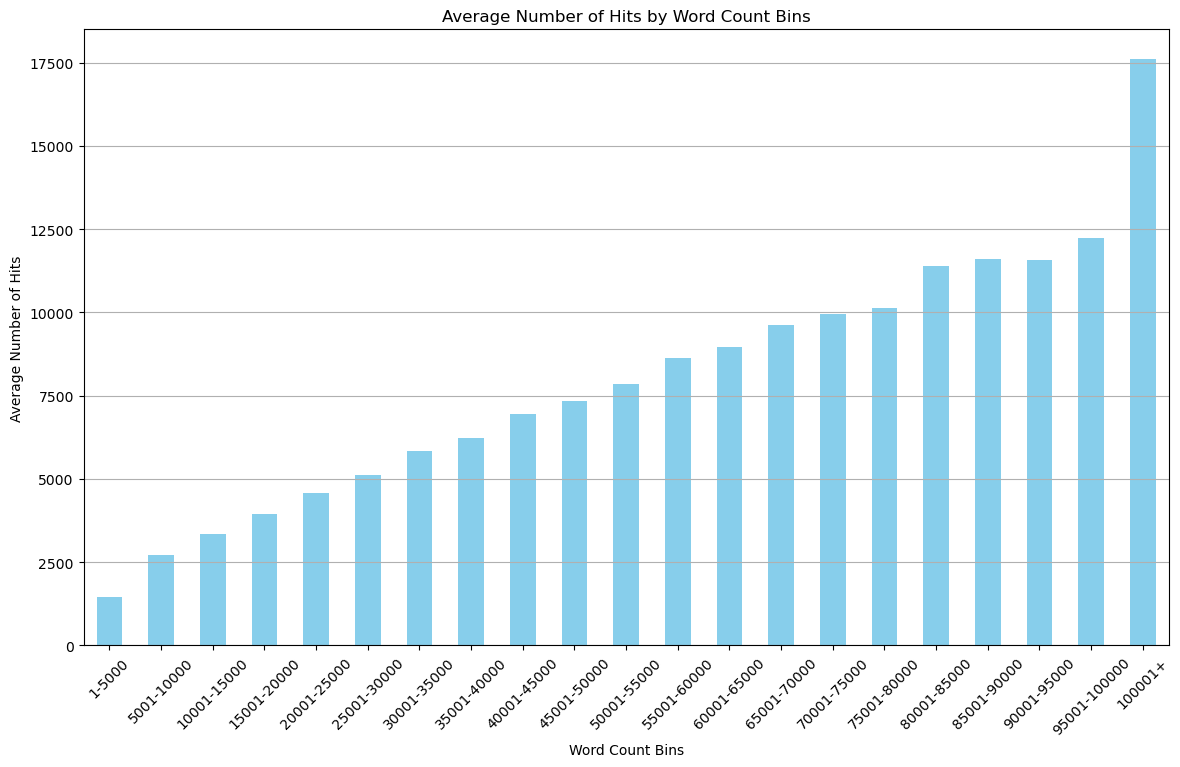

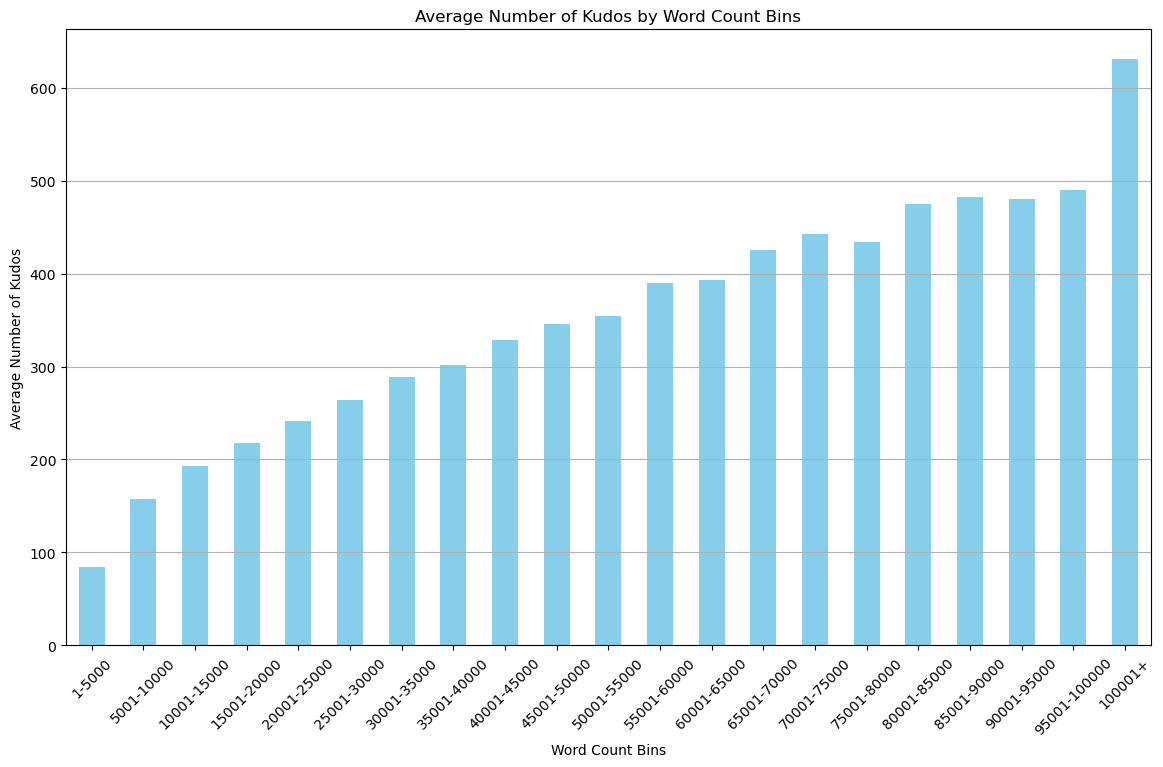

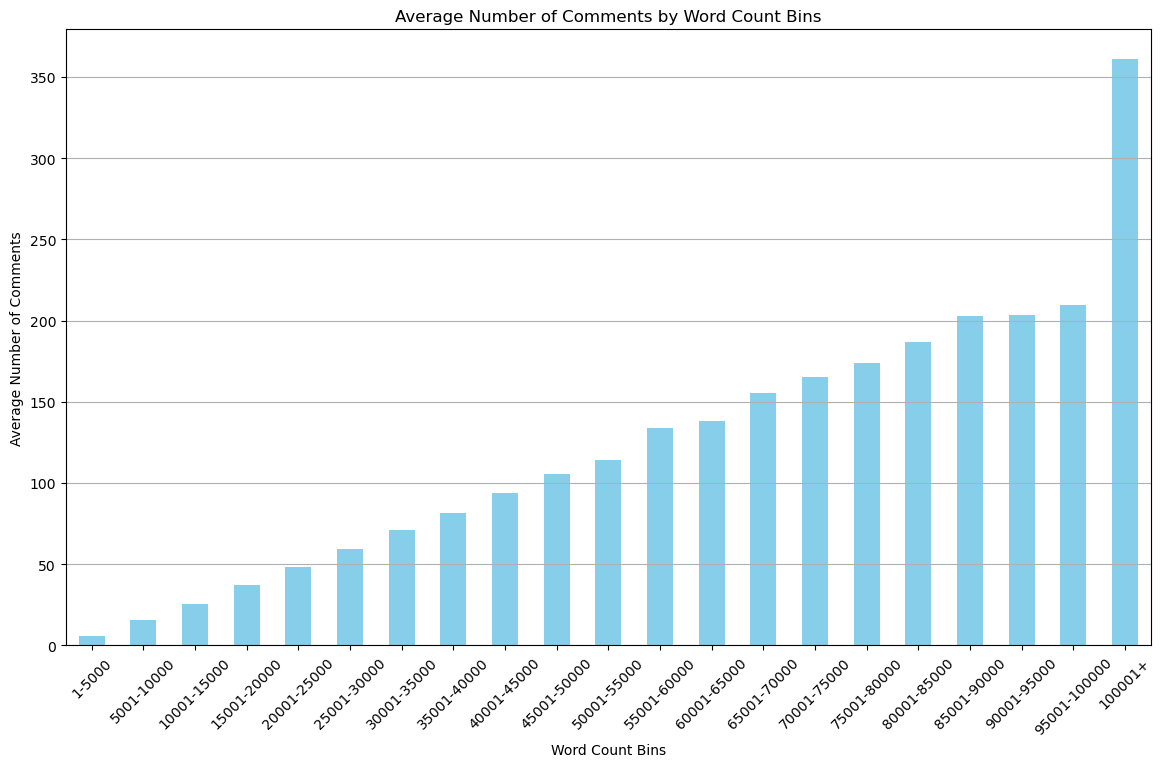

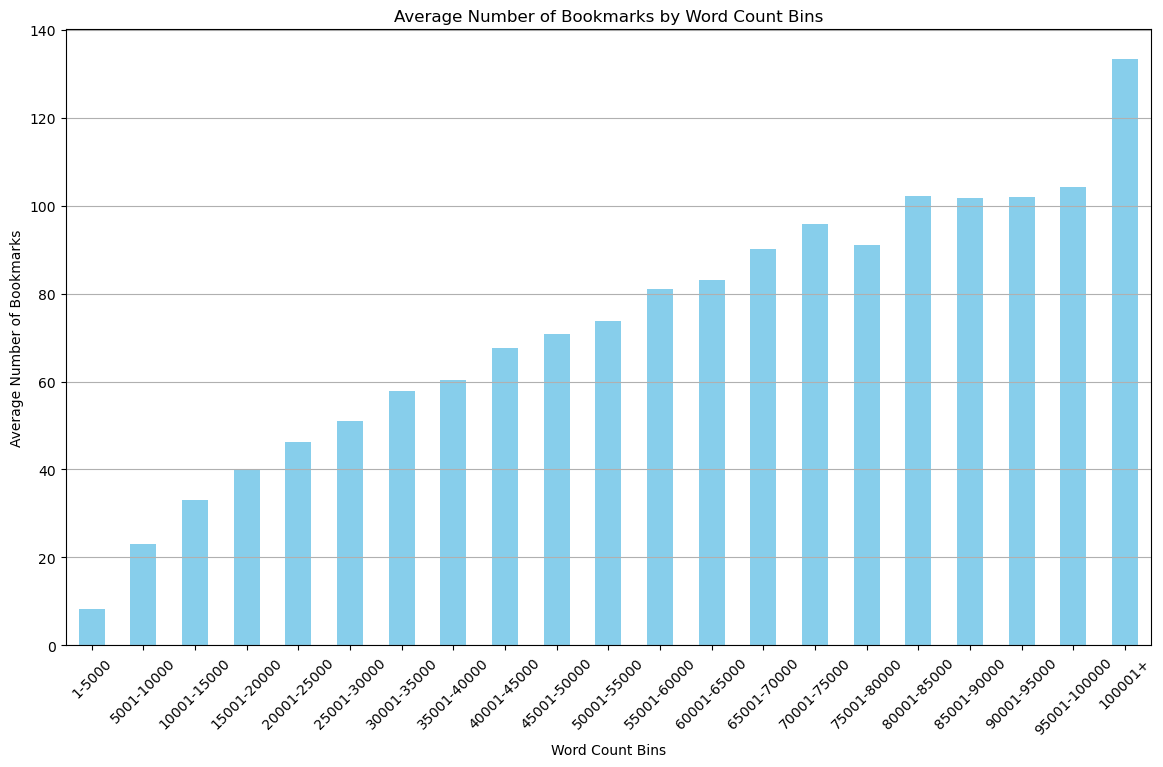

In [11]:
# Define the bins for word counts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, float('inf')]

# Create a new column in the DataFrame to represent the bin for each fanfic
data['word_bin'] = pd.cut(data['words'], bins=bins, labels=['1-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35001-40000', '40001-45000', '45001-50000', '50001-55000', '55001-60000', '60001-65000', '65001-70000', '70001-75000', '75001-80000', '80001-85000', '85001-90000', '90001-95000', '95001-100000', '100001+'])

# Group the DataFrame by the word bins and calculate the average number of hits for each bin
average_hits_by_bin = data.groupby('word_bin')['hits'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_hits_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Hits by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Hits')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of kudos for each bin
average_kudos_by_bin = data.groupby('word_bin')['kudos'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_kudos_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Kudos by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Kudos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of comments for each bin
average_comments_by_bin = data.groupby('word_bin')['comments'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_comments_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Comments by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of bookmarks for each bin
average_bookmarks_by_bin = data.groupby('word_bin')['bookmarks'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_bookmarks_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Bookmarks by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Bookmarks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [12]:
# Calculate Pearson correlation coefficient for kudos
corr_kudos, p_value_kudos = pearsonr(data['words'], data['kudos'])
print(f"Pearson correlation coefficient (kudos): {corr_kudos:.2f}")
print(f"P-value (kudos): {p_value_kudos:.4f}")

# Calculate Pearson correlation coefficient for comments
corr_comments, p_value_comments = pearsonr(data['words'], data['comments'])
print(f"Pearson correlation coefficient (comments): {corr_comments:.2f}")
print(f"P-value (comments): {p_value_comments:.4f}")

# Calculate Pearson correlation coefficient and for bookmarks
corr_bookmarks, p_value_bookmarks = pearsonr(data['words'], data['bookmarks'])
print(f"Pearson correlation coefficient (bookmarks): {corr_bookmarks:.2f}")
print(f"P-value (bookmarks): {p_value_bookmarks:.4f}")

# Calculate Pearson correlation coefficient and for hits
corr_hits, p_value_hits = pearsonr(data['words'], data['hits'])
print(f"Pearson correlation coefficient (hits): {corr_hits:.2f}")
print(f"P-value (hits): {p_value_hits:.4f}")


Pearson correlation coefficient (kudos): 0.20
P-value (kudos): 0.0000
Pearson correlation coefficient (comments): 0.42
P-value (comments): 0.0000
Pearson correlation coefficient (bookmarks): 0.21
P-value (bookmarks): 0.0000
Pearson correlation coefficient (hits): 0.25
P-value (hits): 0.0000


### Longer Works Are More Popular

For all four measures of popularity, there is a nearly monotonic rise in popularity as length increases. This is especially dramatic for the longest works (those over 100,000 words, equivalent to something like 400 pages).

The pearson-correlation values confirm this analysis, since they are all positive, indicating that as length increases so does popularity.


### Are explicit fanfics more popular?
To answer this question we will create bar charts comparing a fanfic's rating to our four canidate measures of popularity - hits, kudos, comments, and bookmarks. We will then report if the differences in average popularity between ratings are statistically significant.


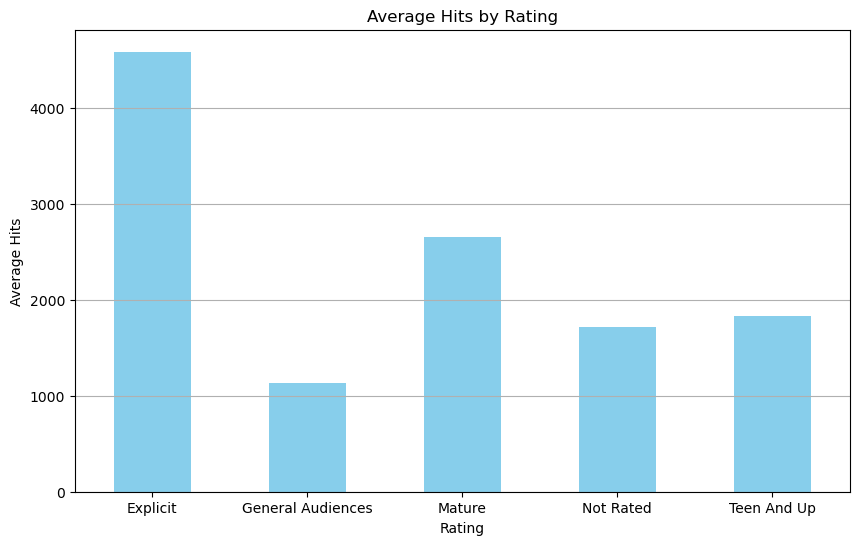

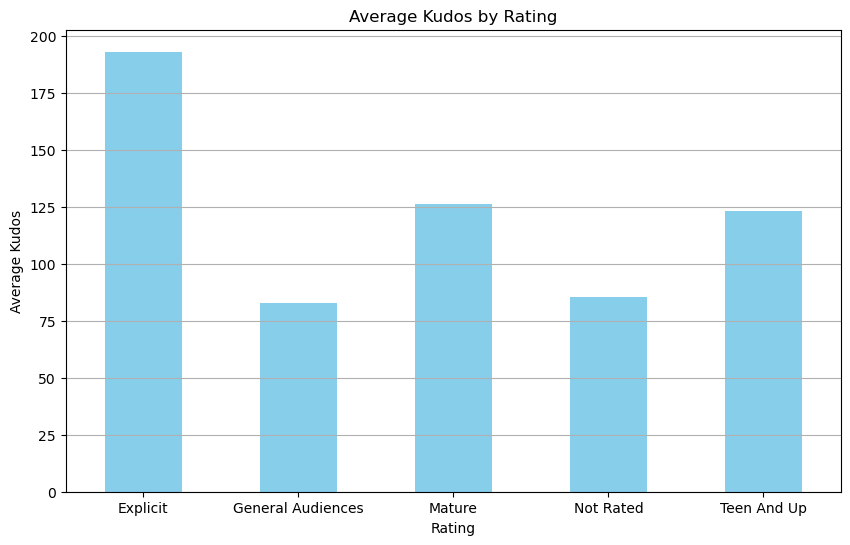

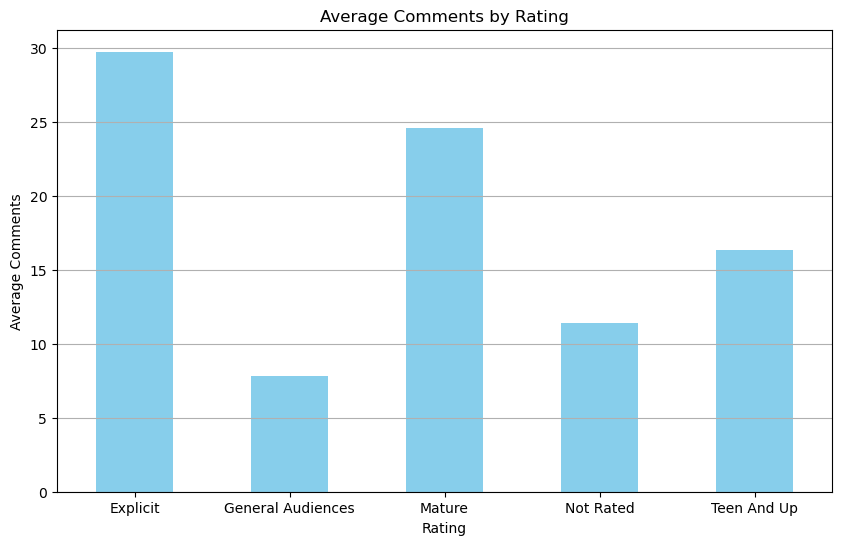

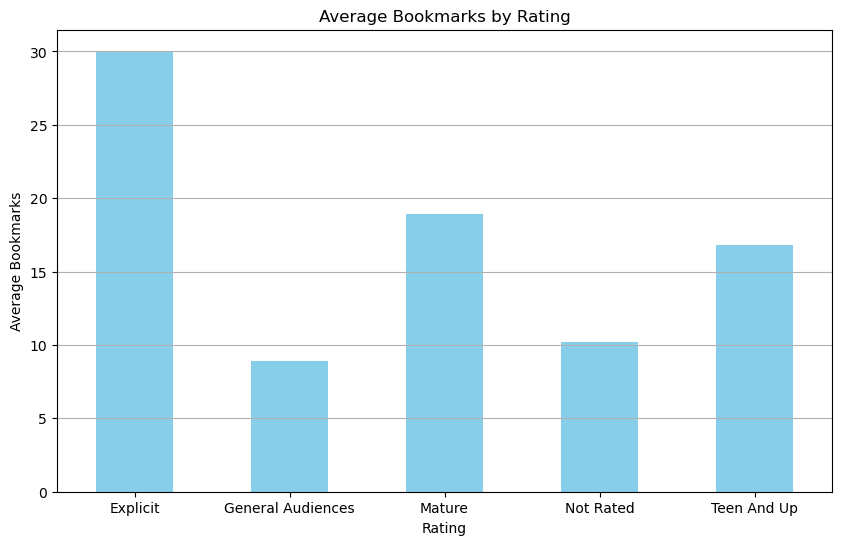

In [13]:
# Group the DataFrame by rating and calculate the average popularity metrics for each rating
average_popularity_by_rating = data.groupby('RatingName').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot the bar charts for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    average_popularity_by_rating[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Rating')
    plt.xlabel('Rating')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()


In [14]:
# Perform t-test to compare the average popularity metrics between different ratings
for metric in metrics:
    print(f"\nT-test results for {metric.capitalize()}:\n")
    for i in range(len(average_popularity_by_rating.index)):
        for j in range(i+1, len(average_popularity_by_rating.index)):
            rating1 = average_popularity_by_rating.index[i]
            rating2 = average_popularity_by_rating.index[j]
            avg1 = data[data['RatingName'] == rating1][metric]
            avg2 = data[data['RatingName'] == rating2][metric]
            t_statistic, p_value = ttest_ind(avg1, avg2)
            print(f"T-test between ratings {rating1} and {rating2}:")
            print(f"  - T-statistic: {t_statistic:.2f}")
            print(f"  - P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("  - Statistically significant difference (p < 0.05)")
            else:
                print("  - No statistically significant difference (p >= 0.05)")


T-test results for Hits:

T-test between ratings Explicit and General Audiences:
  - T-statistic: 341.99
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings Explicit and Mature:
  - T-statistic: 119.68
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings Explicit and Not Rated:
  - T-statistic: 163.90
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings Explicit and Teen And Up:
  - T-statistic: 252.61
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings General Audiences and Mature:
  - T-statistic: -183.30
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings General Audiences and Not Rated:
  - T-statistic: -78.45
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test between ratings General Audiences and Teen And Up:
  - T-statistic: -135.58
  - P-val

### Explicit Works Are More Popular

Our analysis shows that the average popularity of a work increases as the rating increases, with explicit works most popular, followed by mature, then teen, then unrated, and finally general rated fics are the least popular.

The t-test confirmed this result, indicating that the differences in popularity between ratings are all highly significant and unlikely due to chance alone.


### Are finished works more popular?
To answer this question we will compare the average popularity of finished v. unfinished fanfictions for each of the four candidate measures of popularity, and report on whether the differences are statistically significant.


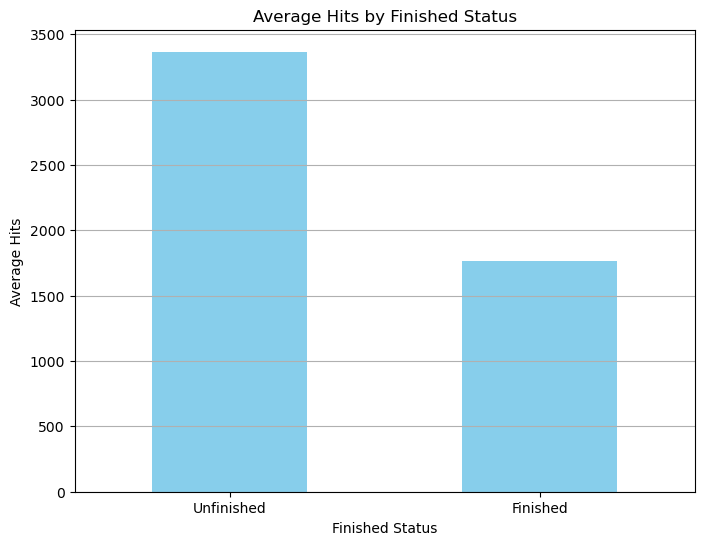

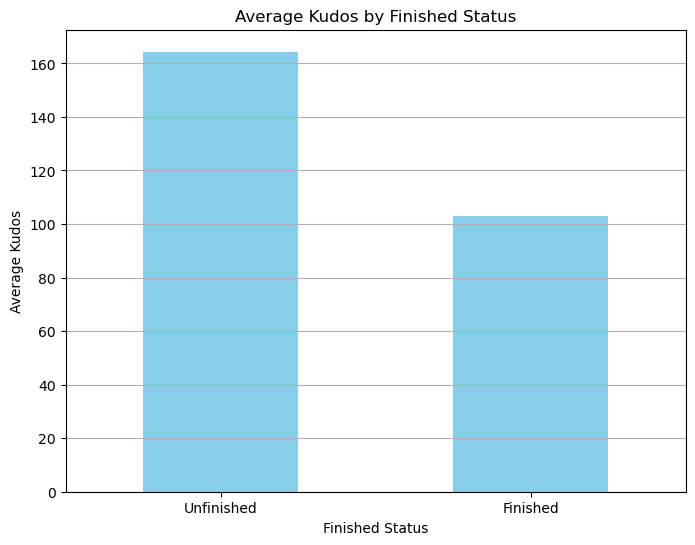

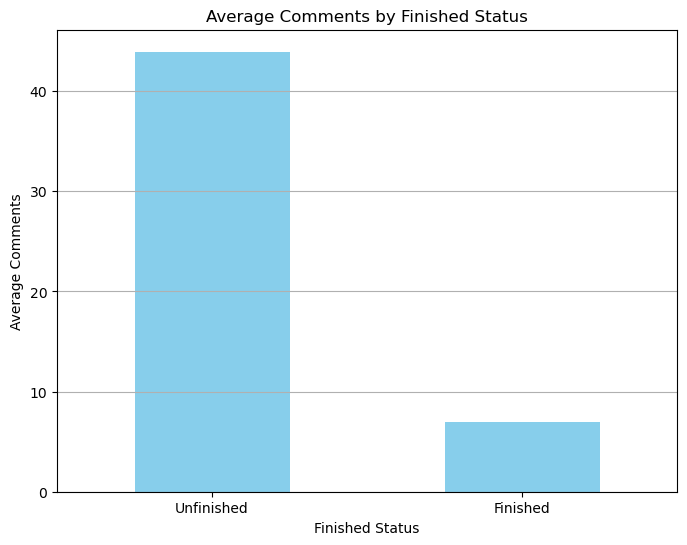

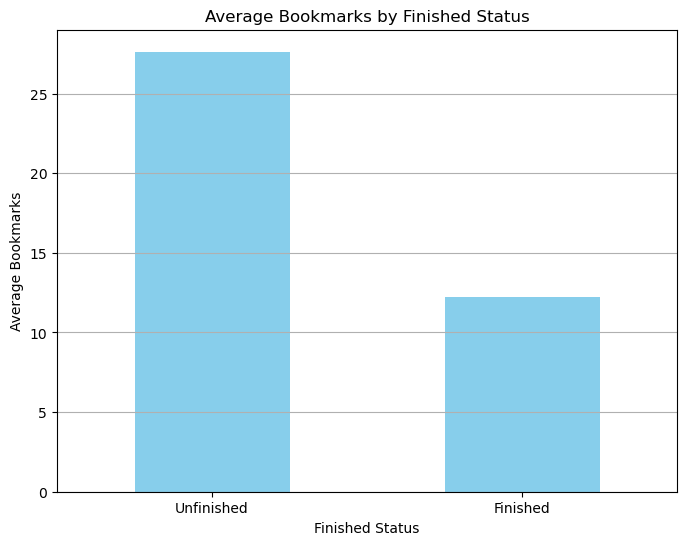

In [15]:
# Group the DataFrame by "finished" column and calculate the average popularity metrics for each group
average_popularity_by_finished = data.groupby('finished').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot bar charts comparing the average popularity of finished vs. unfinished fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    average_popularity_by_finished[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Finished Status')
    plt.xlabel('Finished Status')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks([1, 0], ['Finished', 'Unfinished'], rotation=0)  # Customize x-axis labels
    plt.grid(axis='y')
    plt.show()


In [16]:
# Perform t-test to compare the average popularity metrics between finished and unfinished fanfictions
print("T-test results:")
for metric in metrics:
    avg_finished = data[data['finished'] == 0][metric]
    avg_unfinished = data[data['finished'] == 1][metric]
    t_statistic, p_value = ttest_ind(avg_finished, avg_unfinished)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


T-test results:
T-test for Hits:
  - T-statistic: 225.88
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Kudos:
  - T-statistic: 197.76
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Comments:
  - T-statistic: 435.05
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Bookmarks:
  - T-statistic: 223.22
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)


### Unfinished Works Are More Popular

On all four metrics of popularity, it is unfinished works that are more popular than finished works.

The t-tests confirm that this difference is highly statistically significant and unlikely to be due to chance.


### Are English fanfics more popular?

To answer this question, we will create a bar chart comparing fanfics written in English with those written in some other language for all four metrics of popularity, and see if the differences in popularity are statistically significant.


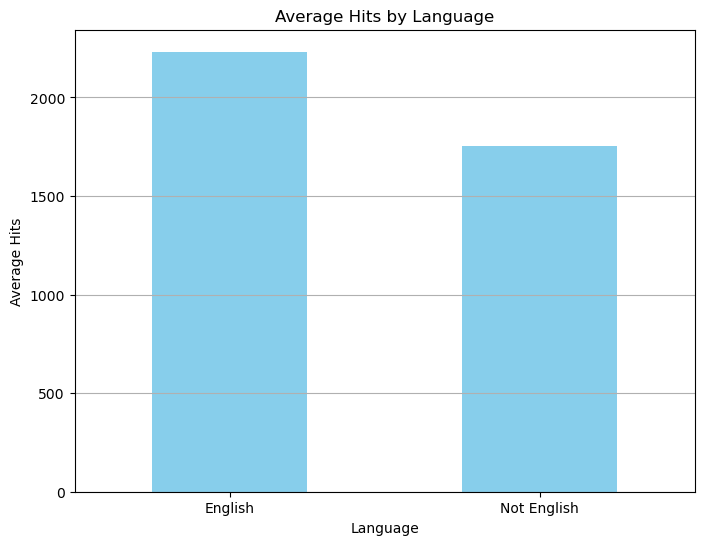

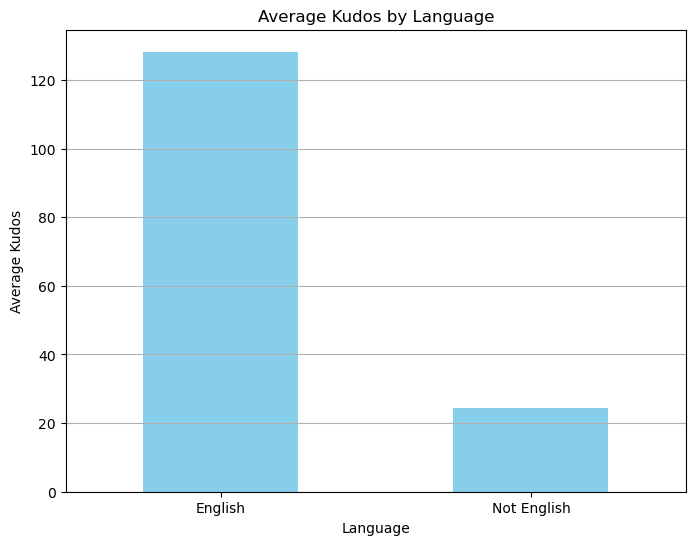

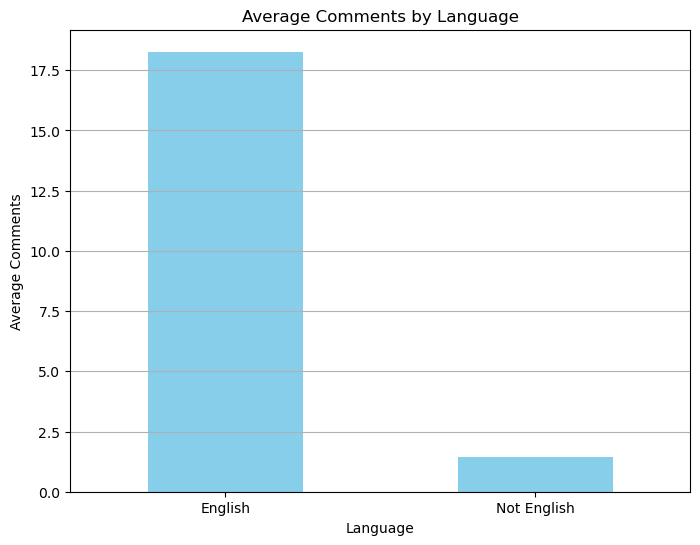

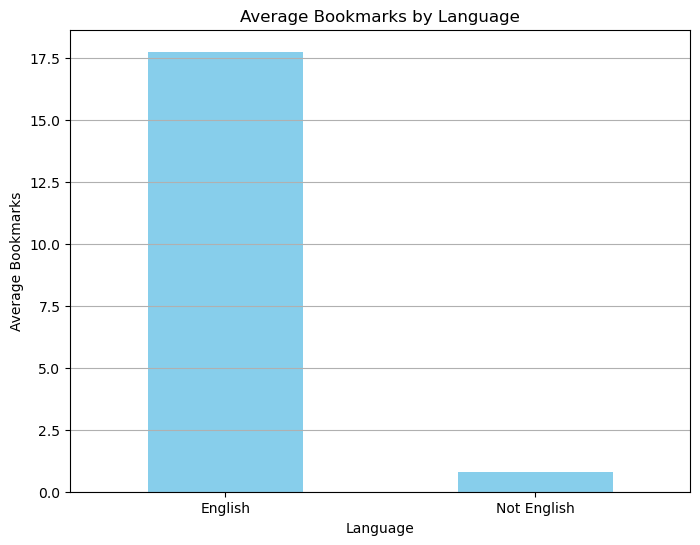

In [17]:
# Define a function to categorize languages as English or not English
def categorize_language(language):
    return 'English' if language == 'English' else 'Not English'

# Apply the function to create a new column for language categories
data['LanguageCategory'] = data['LanguageName'].apply(categorize_language)

# Group the DataFrame by "LanguageCategory" column and calculate the average popularity metrics for each group
average_popularity_by_language = data.groupby('LanguageCategory').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot bar charts comparing the average popularity of English vs. not English fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    average_popularity_by_language[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Language')
    plt.xlabel('Language')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()


In [18]:
# Perform t-test to compare the average popularity metrics between English and not English fanfictions
print("T-test results:")
for metric in metrics:
    avg_english = data[data['LanguageCategory'] == 'English'][metric]
    avg_not_english = data[data['LanguageCategory'] != 'English'][metric]
    t_statistic, p_value = ttest_ind(avg_english, avg_not_english)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


T-test results:
T-test for Hits:
  - T-statistic: 42.70
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Kudos:
  - T-statistic: 212.26
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Comments:
  - T-statistic: 124.11
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)
T-test for Bookmarks:
  - T-statistic: 155.39
  - P-value: 0.0000
  - Statistically significant difference (p < 0.05)


### English Works Are More Popular

The charts show that English works have more hits, kudos, comments, and bookmarks than non-English works, with the differences especially pronounced with kudos, comments, and bookmarks.

Our t-tests confirm this analysis, all differences are highly significant and unlikely to be due to chance.


### How popular are the most popular works?
To answer this question, we will calculate what percentage of the total number of hits, kudos, comments, and bookmarks the most popular 1%, 5%, and 10% of fics receive.


In [19]:
# Calculate the total hits, kudos, comments, and bookmarks
total_hits = data['hits'].sum()
total_kudos = data['kudos'].sum()
total_comments = data['comments'].sum()
total_bookmarks = data['bookmarks'].sum()

# Sort the data by hits, kudos, comments, and bookmarks in descending order
sorted_data_hits = data.sort_values(by='hits', ascending=False)
sorted_data_kudos = data.sort_values(by='kudos', ascending=False)
sorted_data_comments = data.sort_values(by='comments', ascending=False)
sorted_data_bookmarks = data.sort_values(by='bookmarks', ascending=False)

# Calculate the number of fanfics in the top 1%, 5%, and 10% based on hits, kudos, comments, and bookmarks
total_fics = len(data)
top_1_percent = int(total_fics * 0.01)
top_5_percent = int(total_fics * 0.05)
top_10_percent = int(total_fics * 0.10)

# Calculate the percentage of total hits, kudos, comments, and bookmarks received by the top 1%, 5%, and 10% of fanfics
percent_hits_top_1 = sorted_data_hits.head(top_1_percent)['hits'].sum() / total_hits * 100
percent_hits_top_5 = sorted_data_hits.head(top_5_percent)['hits'].sum() / total_hits * 100
percent_hits_top_10 = sorted_data_hits.head(top_10_percent)['hits'].sum() / total_hits * 100

percent_kudos_top_1 = sorted_data_kudos.head(top_1_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_5 = sorted_data_kudos.head(top_5_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_10 = sorted_data_kudos.head(top_10_percent)['kudos'].sum() / total_kudos * 100

percent_comments_top_1 = sorted_data_comments.head(top_1_percent)['comments'].sum() / total_comments * 100
percent_comments_top_5 = sorted_data_comments.head(top_5_percent)['comments'].sum() / total_comments * 100
percent_comments_top_10 = sorted_data_comments.head(top_10_percent)['comments'].sum() / total_comments * 100

percent_bookmarks_top_1 = sorted_data_bookmarks.head(top_1_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_5 = sorted_data_bookmarks.head(top_5_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_10 = sorted_data_bookmarks.head(top_10_percent)['bookmarks'].sum() / total_bookmarks * 100

# Print the results
print("Percentage of total hits received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_hits_top_1:.2f}%")
print(f"- Top 5%: {percent_hits_top_5:.2f}%")
print(f"- Top 10%: {percent_hits_top_10:.2f}%\n")

print("Percentage of total kudos received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_kudos_top_1:.2f}%")
print(f"- Top 5%: {percent_kudos_top_5:.2f}%")
print(f"- Top 10%: {percent_kudos_top_10:.2f}%\n")

print("Percentage of total comments received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_comments_top_1:.2f}%")
print(f"- Top 5%: {percent_comments_top_5:.2f}%")
print(f"- Top 10%: {percent_comments_top_10:.2f}%\n")

print("Percentage of total bookmarks received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_bookmarks_top_1:.2f}%")
print(f"- Top 5%: {percent_bookmarks_top_5:.2f}%")
print(f"- Top 10%: {percent_bookmarks_top_10:.2f}%")


Percentage of total hits received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 22.61%
- Top 5%: 45.35%
- Top 10%: 58.84%

Percentage of total kudos received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 20.54%
- Top 5%: 43.82%
- Top 10%: 57.96%

Percentage of total comments received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 35.03%
- Top 5%: 60.24%
- Top 10%: 72.08%

Percentage of total bookmarks received by the top 1%, 5%, and 10% of fanfics:
- Top 1%: 31.94%
- Top 5%: 58.44%
- Top 10%: 71.73%


### The Distribution of Popularity is Highly Unequal

The top 1% most popular works recieved between 20% and 35% of all hits, kudos, comments, and bookmarks. The top 5% most popular recieved between 43% and 60%, while the top 10% recieved between 58% and 72%. 

This is a highly unequal outcome, especially among comments and bookmarks!


### Tag Analysis

We are still in the early stages of analyzing the tags on our sample fanfics. Due to processing time, we decided to look at the first 100,000 uses of tags. We filtered out any tags that were not from the first 10,000 works in our file, "reduced_project_info.csv". This reduced our sample set of tags down to 4194 tags. We then looked at the number of times each specific tag was used, and found the most popular tags.


In [20]:
import pandas as pd
import csv
import sqlite3

# Assessing Top Tags
data = pd.read_csv("small_story_tags.csv")
try:
    data = data.drop(columns= ["Unnamed: 0"])
    data= data.drop(columns=["Unnamed: 0.1"])
except:
    pass

# Top 40 Tags
tag_counts = data["Tag Name"].value_counts()[:40]

tag_list = []
count_list = []
for value in tag_counts.index.to_list():
    tag_list.append(value)
    count_list.append(tag_counts[value])


top_40 = pd.DataFrame({ "Tag Name": tag_list,
                       "Total Uses": count_list
})
unique_stories = []

for number in data["storyId"]:
    if number not in unique_stories:
        unique_stories.append(number)
    
print(len(unique_stories))

469


We see that there are 469 works represented in our 4194 tag sample set. This will help us keep in mind the percentage of works that use each of the most popular tags.


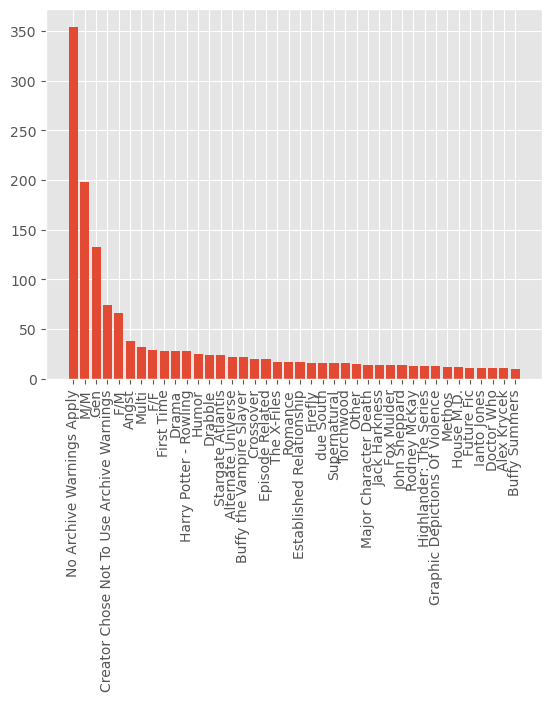

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Graphing our Series
plt.bar(top_40.index.to_list(), top_40["Total Uses"])
plt.xticks(top_40.index.to_list(), top_40["Tag Name"], rotation = 90)
plt.show()

# print(top_40)

By printing the top_40 data frame, we can see that 354 of the 469 works used the "No Archive Warnings Apply Tag". The second most popular tag was "M/M", which denotes that a work has a relationship between two men. The third most popular tag was "Gen". So the most popular tags seem to support the conclusion from earlier, that being that the majority of fics in our sample set are rated G for General. 


### Evaluation

Our project successfully completed many of our milestones. We collected, cleaned, and analyzed a large amount of data in a variety of ways and along the way discovered many interesting things about fanfiction.

However, we did not succeed in every goal. In our project proposal, we stated our desire to analyze how the number of fanfictions on the site AO3 changed over time, however this analysis produced very strange results – like works being uploaded in 1980, decades before the site was available, so we didn’t include this code in our analysis. One possibility behind this oddity is that AO3 lets users manually select the date uploaded when posting a fan work to the site, so if people manually selected 1980 as their publishing date when uploading, that would explain the oddities in the data.

Another thing that we wanted to do was create a sentiment analysis of the text and see if positive or negative sentiment were correlated with popularity, however none of our group members knew much about sentiment analysis and the basic version we covered in class seemed to be too basic for our purposes. So, we elected not to perform this analysis.

Our project comes with obvious limitations. First, we analyzed only a portion of the fanfiction available on archiveofourown, and the archive only has a portion of the total quantity of fan works made. Thus, it is possible that our analysis will not generalize to fandom as a whole. That said, we have quite a substantial sample – over 6 million works – and no strong reason to believe that our sample is statistically different from fandom as a whole.

A second limitation is the risk of confounding. To illustrate this risk, we found that on average the longer a work is the more popular it is. However, this does not mean that length causes a work to be more popular. It could be that a third thing – perhaps writing quality or enthusiasm on the author’s part for the story – produces both length and popularity. It could also be that as a work gets more popular, the fame motivates the author to write more of it – an example of reverse causation. Similar confounding or reverse causation stories could be told for all of the statistical differences we found. However, since we make no claim that we have identified causation only correlation, our statistical analysis is on firmer ground.

A third limitation is our project’s reliance on the web-scraping efforts of CoolCat, the reddit user who collected and publicized the data we use for analysis. If they made systemic errors in data collection, organization, or storage those errors would very likely transfer over to our own analysis. Spot-checking the data for particular works on the archive itself showed that CoolCat’s data is accurate, as far as we can tell, however no systematic evidence of accuracy was gathered.


## Ethical Data Concerns

From the project proposal, our concerns were threefold: 
- First, that the authors of the fanworks analyzed did not consent to their data being collected.
- Second, that personal information could be discovered.
- Third, that our analysis could contribute to the poor public perception of fanfiction.

After project completion, we have a better perspective on these ethical risks:
- Firstly, while authors were not contacted to ask for their consent, the works that were scraped and have usable data were all unrestricted, meaning they were publicly accessible by anyone visiting AO3. This data was also collected and shared publically by the CoolCat; we did not scrape the data ourselves. As mentioned in our proejct proposal, since the release of AI tools such as Chat GPT, some AO3 authors have been upset that machine learning could be used on their works and used to create "new" fan works. Our project will never try to take the gathered text and reproduce a similar work.
- Secondly, while there may be personal information in the data we are looking at, our data analysis has not uncovered any of this information.
- Thirdly, while fanfiction does have a negative reputation in the public eye, we still think that since we are not publishing our analysis in public that our project will have little reputational impact regardless of its findings. That being said, we have discovered that in our sample, more explicit/mature works are more popular among fanfic readers. This reinforces the popular perception of fanfic-as-porn. However, we also found that a majority of works in our sample are rated "General" or "Teen", implying that most fanfic written is not pornographic, even if more explicit works are more popular.


## Summary

Using data from a web-scrapping project, we dowloanded information about millions of fan-works published on Archive Of Our Own. Then, after cleaning and converting the data into csv format, we conducted a variety of statistical tests on the "meta-data" of each fan-work, as presented in the **Analysis/Methods/Results** section. We also analyzed the tags associated with each fan-work.

From this analysis we have come to several conclusions:
- The different notions of popularity - hits, kudos, comments, and bookmarks - are positively correlated.
- Fanworks tend to be short, mostly under 5000 words, although there is high variance.
- Most works are published in English, with Chinese and Russian distant runners-up.
- Longer works tend to be more popular.
- Explicit works tend to be more popular.
- Unfinished works tend to be more popular.
- Works in English tend to be more popular.
- The distribution of popularity is highly unequal, with the most popular works recieving a highly disproportionate number of the total hits, kudos, comments, and bookmarks.